# Chem 277B Spring 2024 Tutorial 5
---
# Outline

+ Introduction and installation
+ Data visualization with `catplot`, `relplot` and `pairplot`
+ Correlation matrix
+ Clustering
+ Quick Markdown & LaTeX syntax

## Seaborn

+ [Documentation](https://seaborn.pydata.org/index.html)
+ Installation: `pip install seaborn` or `conda install seaborn -c conda-forge`

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn also provides better integration with Pandas data structures.

<img src="http://seaborn.pydata.org/_images/scatterplot_matrix.png" width="800" />

### Bar Plot

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("compounds.csv")
df.head()

,A,B,C,D,type,Start assignment
0,6.4,2.9,4.3,1.3,amide,1
1,5.7,4.4,1.5,0.4,phenol,2
2,6.7,3.0,5.2,2.3,ether,0
3,5.8,2.8,5.1,2.4,ether,1
4,6.4,3.2,5.3,2.3,ether,0


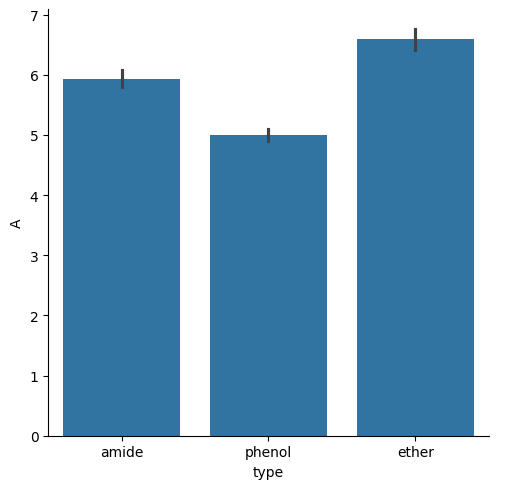

In [4]:
sns.catplot(data=df, x='type', y='A', kind='bar')

### Violin plot

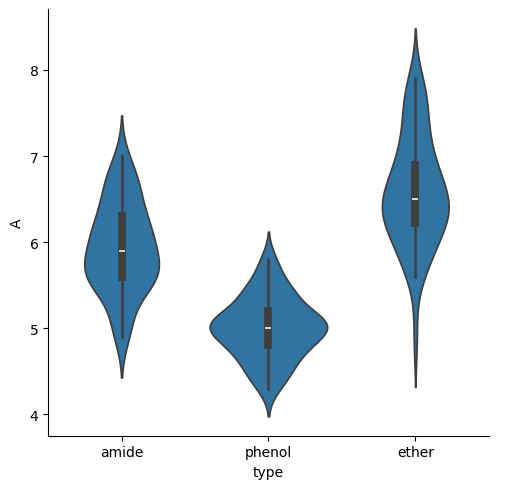

In [5]:
sns.catplot(data=df, x='type', y='A', kind='violin')

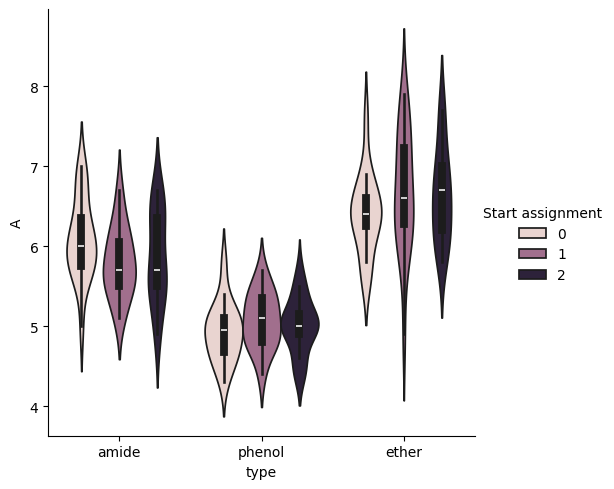

In [6]:
sns.catplot(data=df, x='type', y='A', kind='violin', hue='Start assignment')

### Scatter plot

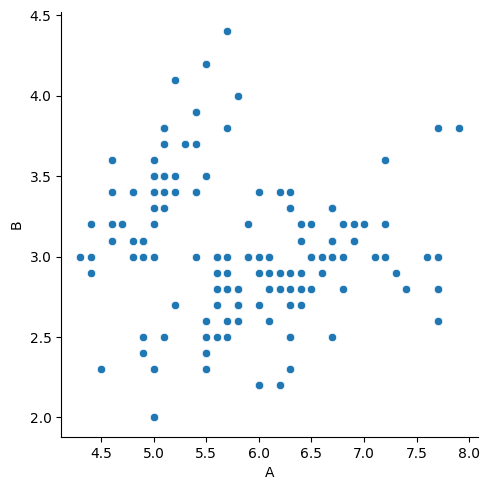

In [7]:
sns.relplot(data=df, x='A', y='B')

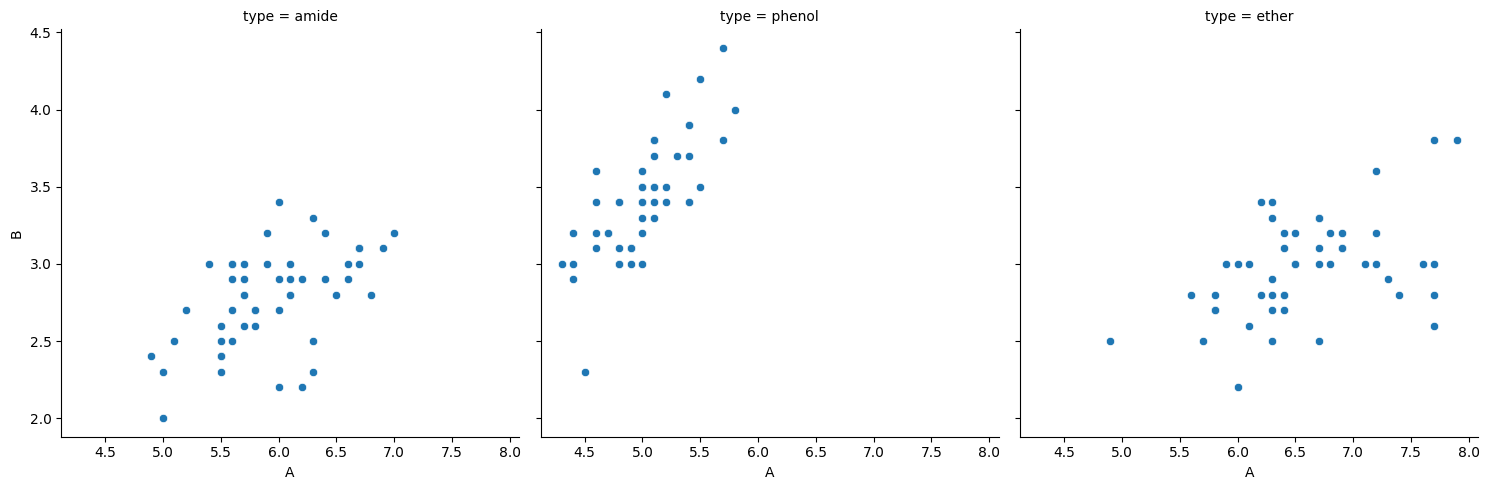

In [8]:
sns.relplot(data=df, x='A', y='B', col='type')

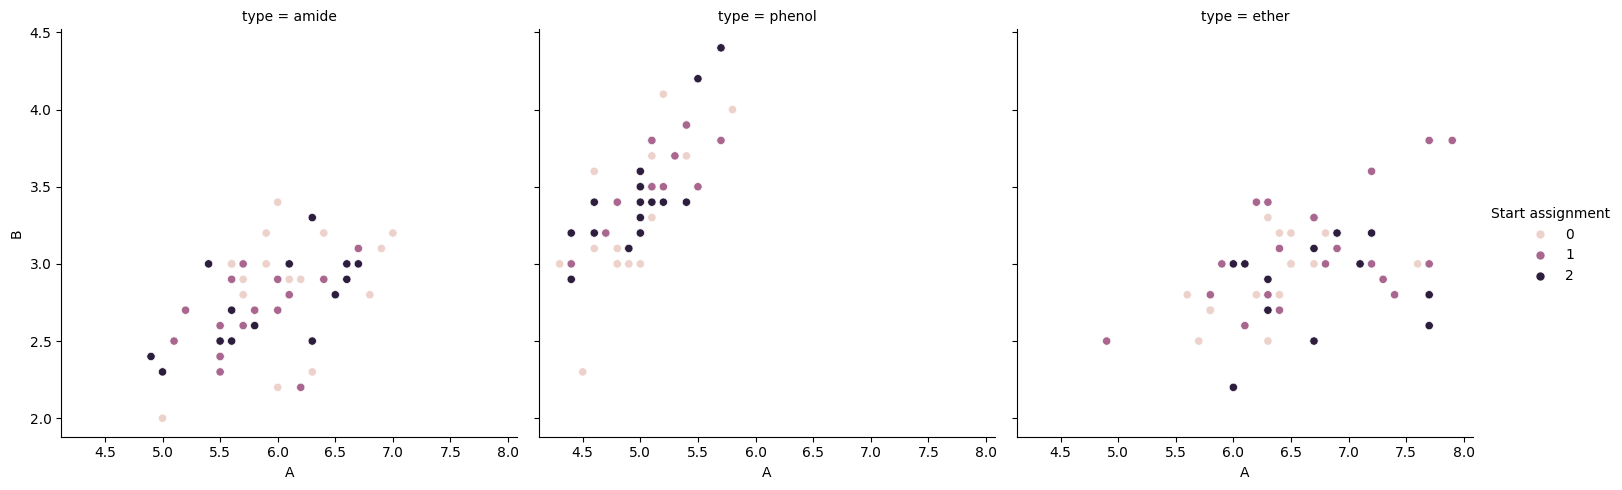

In [9]:
sns.relplot(data=df, x='A', y='B', col='type', hue='Start assignment')

### Pair Plot

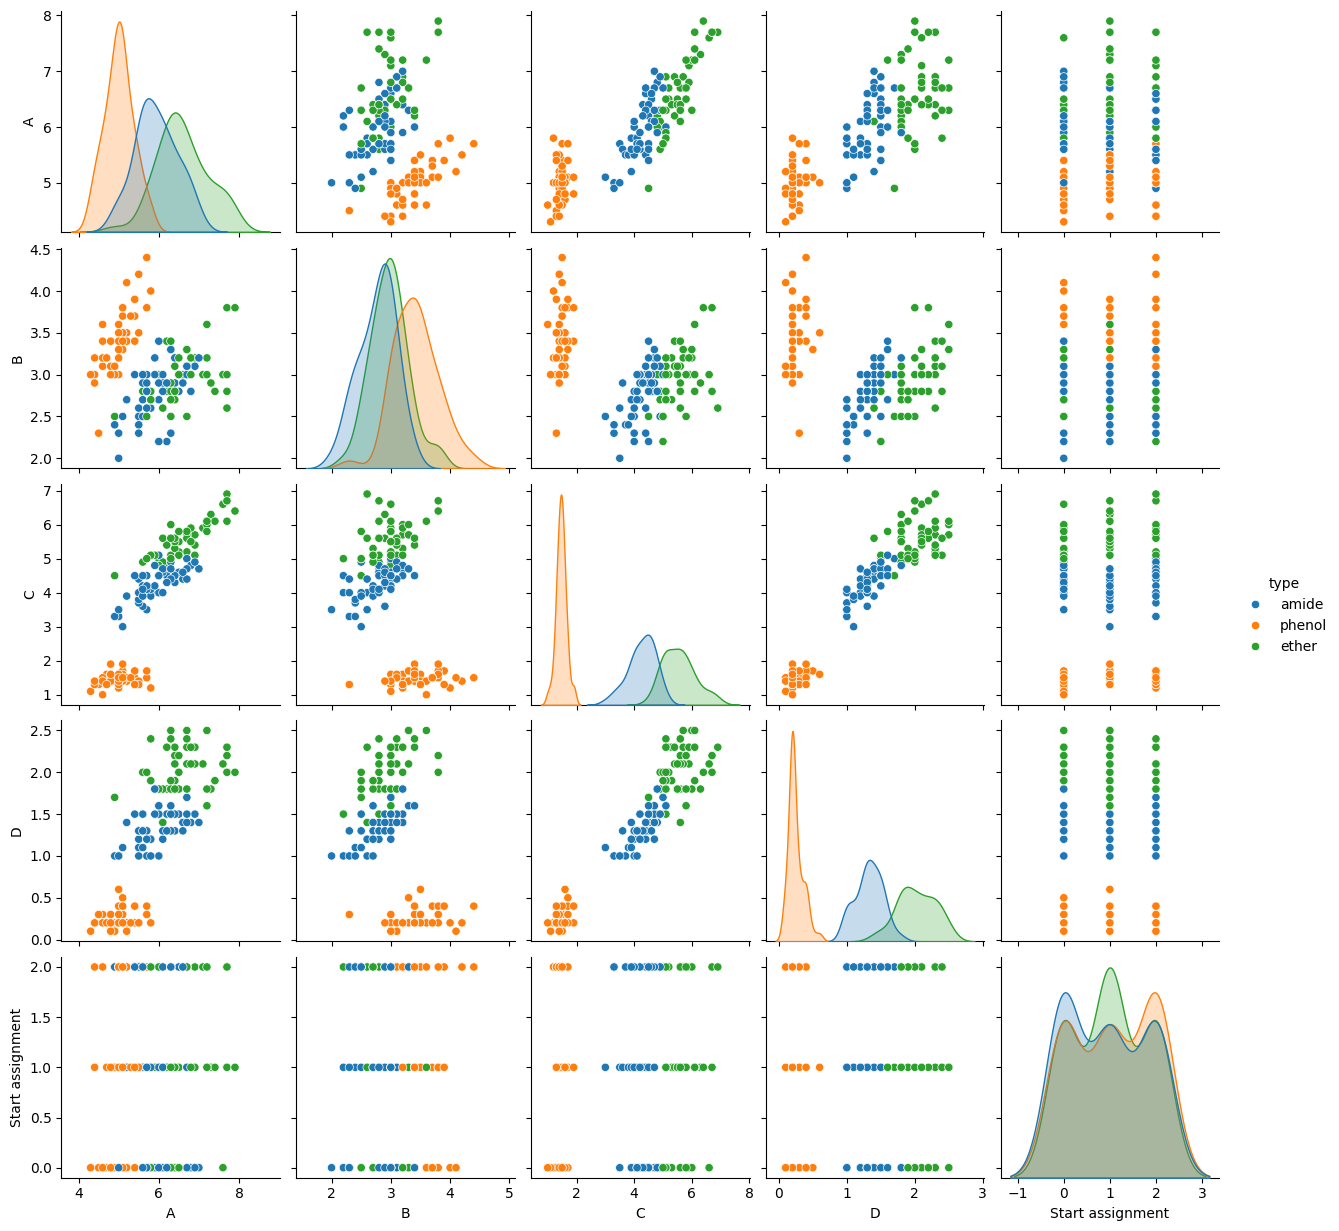

In [10]:
sns.pairplot(data=df, hue='type')

## Correlation matrix

The **correlation coefficient** between two random variables $\mathrm{X}$ and $\mathrm{Y}$ are defined as:

$$\frac{\mathrm{Cov}(\mathrm{X,Y})}{\sqrt{\mathrm{Var}(\mathrm{X})\mathrm{Var}(\mathrm{Y})}}=\frac{\sum_{i}(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{[\sum_i (X_i-\bar{X})^2][\sum_i (Y_i-\bar{Y})^2]}}$$

The correlation coefficient should be in the range of $[-1, 1]$. When $X=Y$, the correlation coefficient will be $1$, and when $X=-Y$ the correlation coefficient will be $-1$.

-0.9986737900067579

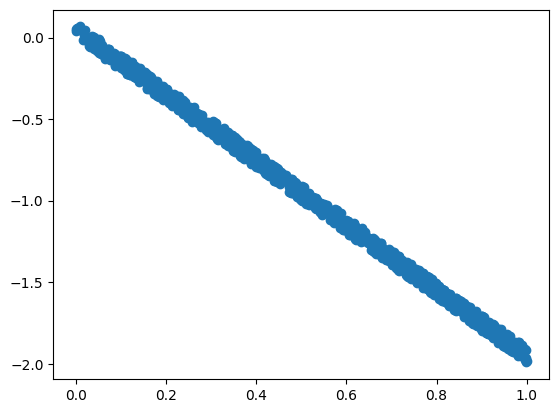

In [11]:
import numpy as np, matplotlib.pyplot as plt


X = np.random.random(1000)
# Y = np.random.random(1000)
Y = -2*X + np.random.random(1000)*.1

def corrcoef(X, Y):
    X_shift = X - np.mean(X)
    Y_shift = Y - np.mean(Y)
    return np.sum(X_shift * Y_shift) / np.sqrt(np.sum(X_shift ** 2) * np.sum(Y_shift ** 2))

plt.scatter(X, Y)
corrcoef(X, Y)

In [12]:
wines = pd.read_csv("wines.csv").iloc[:, :-2]
features = wines.values
features.shape

(178, 13)

In [14]:
features

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, ..., 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.483e+01, 1.640e+00, 2.170e+00, ..., 1.080e+00, 2.850e+00,
        1.045e+03],
       ...,
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02],
       [1.225e+01, 1.730e+00, 2.120e+00, ..., 1.000e+00, 3.170e+00,
        5.100e+02]])

In [28]:
wines.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320


In [33]:
# use numpy to calculate corr coef
# corrmat = np.corrcoef(features)
corrmat = np.corrcoef(features.T)
corrmat.shape

(13, 13)

<Axes: >

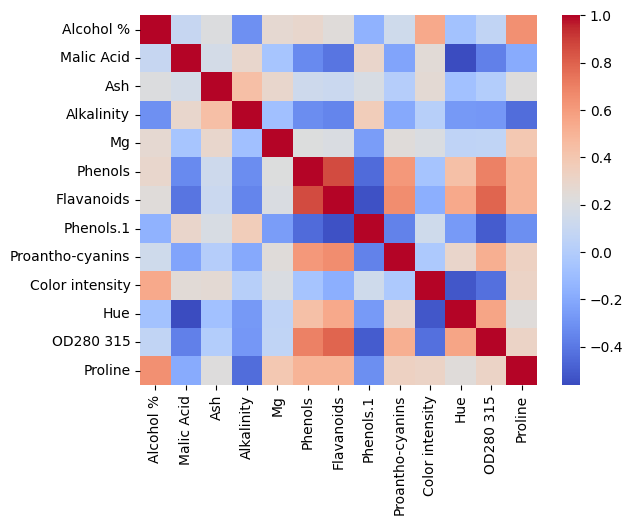

In [36]:
# seaborn vis
sns.heatmap(corrmat, cmap='coolwarm', xticklabels=wines.columns, yticklabels=wines.columns)

<Axes: >

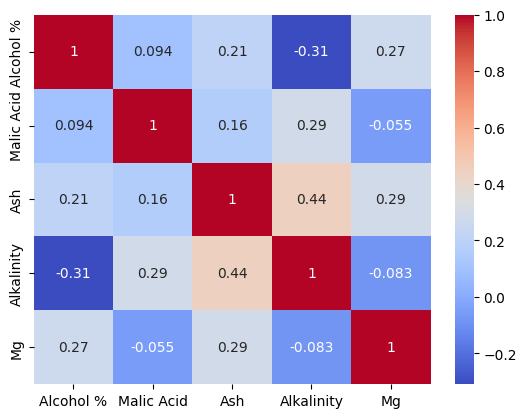

In [39]:
# seaborn vis
i = 5
sns.heatmap(corrmat[:i, :i], cmap='coolwarm', xticklabels=wines.columns[:i], yticklabels=wines.columns[:i], annot=True)

## Clustering

Clustering is a machine learning technique that involves grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups. It's widely used for exploratory data analysis to find natural groupings, patterns, or structures within data without prior knowledge of group definitions.

<img src="https://analystprep.com/study-notes/wp-content/uploads/2021/03/Img_12.jpg" width="600" />

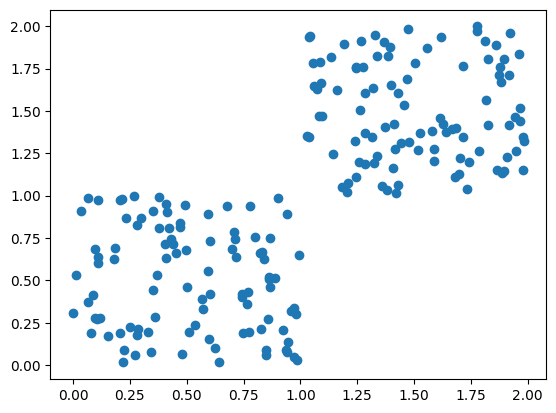

In [40]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def generate_data():
    return np.vstack([
        np.random.random((100, 2)),
        np.random.random((100, 2)) + 1
    ])

data = generate_data()
plt.scatter(data[:, 0], data[:, 1])

In [48]:
# cluster with K-Means
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(data)

KMeans(n_clusters=4)

In [49]:
model.labels_

array([2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3,
       1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       1, 1], dtype=int32)

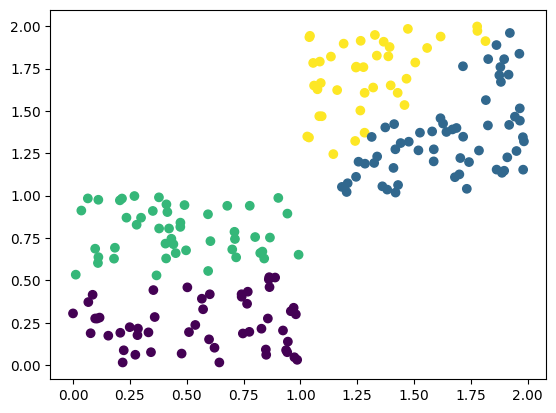

In [50]:
plt.scatter(data[:, 0], data[:,1], c=model.labels_)

## Quick Markdown & LaTeX Syntax

# Header 1

## Header 2

### Header 3

List:
+ Foo
+ Bar

**Bold**

*Italic*

Inline Math: $A, B, C, D, \alpha, \beta, \gamma, \lambda, \delta$

Displaymode Math:

$$ \frac{\partial f}{\partial X} $$

$$ \mathrm{A}, \mathbf{X} $$

[Hyperlink](http://www.google.com)